In [23]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train-balanced-sarcasm.csv")

In [3]:
train_df.head

<bound method NDFrame.head of          label  ...                                     parent_comment
0            0  ...  Yeah, I get that argument. At this point, I'd ...
1            0  ...  The blazers and Mavericks (The wests 5 and 6 s...
2            0  ...                            They're favored to win.
3            0  ...                         deadass don't kill my buzz
4            0  ...  Yep can confirm I saw the tool they use for th...
...        ...  ...                                                ...
1010821      1  ...  No one is calling this an engineered pathogen,...
1010822      1  ...  In a move typical of their recent do-nothing a...
1010823      1  ...  Screw the Disabled--I've got to get to Church ...
1010824      1  ...  I've always been unsettled by that. I hear a l...
1010825      1  ...  Why do the people who make our laws seem unabl...

[1010826 rows x 10 columns]>

In [6]:
train_df['label'].value_counts()


0    505405
1    505368
Name: label, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(train_df['comment'], train_df['label'], random_state=27)

In [11]:
# bigrams
tf_idf = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df=2)
# multinomial logit
logit = LogisticRegression(C=1, n_jobs=4, solver='lbfgs', random_state=27, verbose=1)
# model's pipeline
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), ('logit', logit)])

In [16]:
tfidf_logit_pipeline.fit(x_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   14.4s finished


Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=50000,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logit',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scali

In [17]:
y_pred = tfidf_logit_pipeline.predict(x_test)

In [18]:
print(accuracy_score(y_test, y_pred))

0.7215050614577315


In [20]:
cm = confusion_matrix(y_test, y_pred)

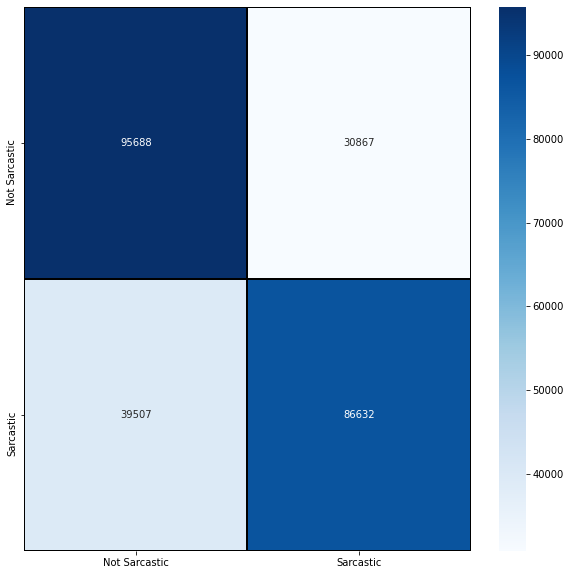

In [21]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , 
                  columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , 
            annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] ,
            yticklabels = ['Not Sarcastic','Sarcastic'])

In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train-balanced-sarcasm.csv")

In [34]:
train_df.head(1)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."


In [4]:
text_data = train_df['comment']
target = train_df['label']

In [6]:
cv = CountVectorizer()
X = cv.fit_transform(text_data.apply(lambda x: np.str_(x)))


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,target,test_size=0.25,random_state=27)


In [9]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
y_pred = clf.predict(x_test)

In [25]:
print("accuracy = {}".format(np.mean((y_test-y_pred)==0)))

accuracy = 0.6749318380575132


In [27]:
cm = confusion_matrix(y_test, y_pred)

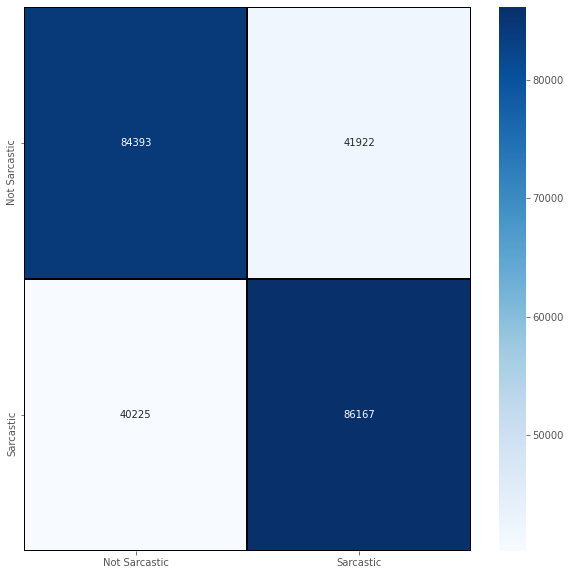

In [28]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , 
                  columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , 
            annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] ,
            yticklabels = ['Not Sarcastic','Sarcastic'])